### Predicción de precio de viajes en __Uber__

In [250]:
#importar uber.csv 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.stats import norm
from scipy.stats import t

#Importar el archivo
df = pd.read_csv('uber.csv')



In [251]:
df.head(3)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1


In [252]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop(['key'] , axis=1 , inplace=True)
df.head(3)


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1


Separar la columna de fecha y hora en dos columnas diferentes

In [253]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_date'] = df['pickup_datetime'].dt.date
df['pickup_time'] = df['pickup_datetime'].dt.time
df.drop(['pickup_datetime'] , axis=1 , inplace=True)
df.head(3)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,19:52:06
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,20:04:56
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,21:45:00


Categoria de la hora del dia por mañana __(0)__ , tarde __(1)__ , noche __(2)__ y madrugada __(3)__.

In [254]:
df['pickup_time'] = df['pickup_time'].apply(lambda x: x.strftime('%H:%M:%S'))
df['pickup_time'] = pd.to_datetime(df['pickup_time'])


C:\Users\Adolfo\AppData\Local\Temp\ipykernel_11764\2015125847.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['pickup_time'] = pd.to_datetime(df['pickup_time'])


In [255]:
df['pickup_time'] = df['pickup_time'].dt.hour
df['pickup_time'] = df['pickup_time'].astype(int)
df['pickup_time'] = df['pickup_time'].astype(str)
df['pickup_time'] = df['pickup_time'].replace(['0','1','2','3','4','5','6'],'3')
df['pickup_time'] = df['pickup_time'].replace(['7', '8', '9', '10','11','12'],'0')
df['pickup_time'] = df['pickup_time'].replace(['13','14','15','16','17','18'],'1')
df['pickup_time'] = df['pickup_time'].replace(['19','20','21','22','23'],'2')

df.head(3)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,2
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,2
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,2


In [256]:
exportar = df.to_csv('uber_revisado.csv')

In [257]:
import folium

# Tomar una muestra aleatoria de 100 puntos para la visualización
sample_df = df.sample(n=100, random_state=1)

# Inicializar el mapa en una ubicación central de la muestra
initial_coords = [sample_df['pickup_latitude'].mean(), sample_df['pickup_longitude'].mean()]
m = folium.Map(location=initial_coords, zoom_start=13)

# Agregar los puntos de recogida al mapa
for _, row in sample_df.iterrows():
    pickup_coords = [row['pickup_latitude'], row['pickup_longitude']]
    folium.CircleMarker(location=pickup_coords, radius=5, color='blue', fill=True, fill_color='blue').add_to(m)

# Guardar el mapa en un archivo HTML
map_file_path = 'uber_pickup_map.html'
m.save(map_file_path)

map_file_path

'uber_pickup_map.html'

In [258]:
import numpy as np

# Definición de la función para calcular la distancia haversina
def haversine_distance(lon1, lat1, lon2, lat2):
    # Radio de la Tierra en kilómetros
    R = 6371.0
    
    # Convertir coordenadas de grados a radianes
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    # Diferencia en las coordenadas
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    # Fórmula haversina
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
    # Distancia en kilómetros
    distance = R * c
    
    return distance

# Aplicar la función para calcular la distancia en el DataFrame
df['distancia'] = haversine_distance(df['pickup_longitude'], df['pickup_latitude'],
                                     df['dropoff_longitude'], df['dropoff_latitude'])

# Mostrar las primeras filas del DataFrame con la nueva columna 'distancia'
df.head()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time,distancia
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,2,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,2,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,2,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,0,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,1,4.475450


In [259]:
#crear un dataframe llamado dataframe con las columnas fare_amount , passenger_count , pickup_date , pickup_time y distancia
dataframe = df[['fare_amount','passenger_count','pickup_date','pickup_time','distancia']]
dataframe.head(3)

,fare_amount,passenger_count,pickup_date,pickup_time,distancia
0,7.5,1,2015-05-07,2,1.683323
1,7.7,1,2009-07-17,2,2.457590
2,12.9,1,2009-08-24,2,5.036377


In [260]:
#convertir la columna pickup_date a tipo numérico y pickup_time a tipo numérico

dataframe['pickup_time'] = dataframe['pickup_time'].astype(int)


C:\Users\Adolfo\AppData\Local\Temp\ipykernel_11764\2036497375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['pickup_time'] = dataframe['pickup_time'].astype(int)


In [261]:
#convertir la columna pickup_date a tipo numérico
dataframe['pickup_date'] = pd.to_datetime(dataframe['pickup_date'])
dataframe['pickup_date'] = dataframe['pickup_date'].dt.strftime('%Y%m%d')
dataframe['pickup_date'] = dataframe['pickup_date'].astype(int)

C:\Users\Adolfo\AppData\Local\Temp\ipykernel_11764\3858617476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['pickup_date'] = pd.to_datetime(dataframe['pickup_date'])
C:\Users\Adolfo\AppData\Local\Temp\ipykernel_11764\3858617476.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['pickup_date'] = dataframe['pickup_date'].dt.strftime('%Y%m%d')
C:\Users\Adolfo\AppData\Local\Temp\ipykernel_11764\3858617476.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [262]:
dataframe.describe()

,fare_amount,passenger_count,pickup_date,pickup_time,distancia
count,200000.000000,200000.000000,2.000000e+05,200000.000000,199999.000000
mean,11.359955,1.684535,2.011807e+07,1.312505,20.855350
std,9.901776,1.385997,1.852717e+04,1.026261,382.964642
min,-52.000000,0.000000,2.009010e+07,0.000000,0.000000
25%,6.000000,1.000000,2.010082e+07,0.000000,1.215222
50%,8.500000,1.000000,2.012032e+07,1.000000,2.120992
75%,12.500000,2.000000,2.013102e+07,2.000000,3.875169
max,499.000000,208.000000,2.015063e+07,3.000000,16409.239135


In [263]:

print(len(dataframe))

200000


In [264]:
#eliminar los valores atípicos de la columna fare_amount , distancia , pickup_date,pickup_time passenger_count por medio de la desviación estándar
dataframe = dataframe[np.abs(dataframe['fare_amount']-dataframe['fare_amount'].mean())<=(3*dataframe['fare_amount'].std())]
dataframe = dataframe[np.abs(dataframe['distancia']-dataframe['distancia'].mean())<=(3*dataframe['distancia'].std())]
dataframe = dataframe[np.abs(dataframe['passenger_count']-dataframe['passenger_count'].mean())<=(3*dataframe['passenger_count'].std())]
dataframe = dataframe[np.abs(dataframe['pickup_time']-dataframe['pickup_time'].mean())<=(3*dataframe['pickup_time'].std())]
dataframe = dataframe[np.abs(dataframe['pickup_date']-dataframe['pickup_date'].mean())<=(3*dataframe['pickup_date'].std())]


dataframe.describe()

,fare_amount,passenger_count,pickup_date,pickup_time,distancia
count,190045.000000,190045.000000,1.900450e+05,190045.000000,190045.000000
mean,10.154345,1.588182,2.011764e+07,1.314815,2.940031
std,6.411927,1.153295,1.851001e+04,1.026757,4.884725
min,-10.900000,0.000000,2.009010e+07,0.000000,0.000000
25%,6.000000,1.000000,2.010081e+07,0.000000,1.199731
50%,8.100000,1.000000,2.012022e+07,1.000000,2.068624
75%,12.100000,2.000000,2.013100e+07,2.000000,3.665261
max,41.040000,5.000000,2.015063e+07,3.000000,973.369304


In [265]:

print(len(dataframe))

190045


In [266]:
X = dataframe[["passenger_count","pickup_date","pickup_time","distancia"]]
y = dataframe["fare_amount"]

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Escalado estandar

In [268]:
scaler = preprocessing.StandardScaler().fit(X_train) 
X_train_scaled = scaler.transform(X_train)

Ajusta los estimadores del modelo lineal.

In [269]:
# Function to get estimators.
def fit_linear_model(X, y):
    """
        Fitting the estimators of linear model.
        Arguments:
            X: a list of values.
            y: a list of values.
        Return:
            estimators: a list with b_1_est and b_0_est.
    """
     
    # Concatenation of arrays.
    X = np.hstack([X, np.ones((X.shape[0], 1))])
    # Fitting estimators.
    estimators = np.linalg.lstsq(X, y, rcond=None)[0]
    
    return estimators

Implementación del modelo lineal.

In [270]:
def linear_model(X, estimators):
    ones_array = np.ones((len(X), 1))
    X = np.hstack((X, ones_array))
    y = np.dot(X, estimators)
    
    return y

In [271]:
# Function to get some model metrics.
def model_metrics(X, y, estimators):
    """
    Getting some metrics from any model.
        Arguments:
            X: a list of features.
            y: a list of labels.
            estimators: any regression model.
        Return:
            metrics: a list with the next metrics (SST, SSE, SSR, R^2, variance)
    """
    # Getting predictions.
    y_ests = linear_model(X, estimators)
    # Getting y_mean
    y_mean = np.array(y).mean()
    # Getting SST.
    sst = np.array([(y_i - y_mean) ** 2 for y_i in y]).sum()
    # Getting SSE.
    sse = np.array([(y_i_est - y_mean) ** 2 for y_i_est in y_ests]).sum()
    # Getting SSR.
    ssr = np.array([(y[i] - y_ests[i]) ** 2 for i in range(len(y))]).sum()
    # Getting R^2
    r_2 = ssr / sst
    # Getting variance
    variance = ssr / (X.shape[0] - (X.shape[1] + 1))
    # Save metrics. 
    metrics = [sst, sse, ssr, r_2, variance]
    
    return metrics

In [272]:
# Function to get the variance of every estimator.
def get_variance(X, y, estimators):
    """
    Getting variance of each estimator.
        Arguments:
            X: a list of features.
            y: a list of labels.
            estimators: any regression model.
        Return:
            vars_j: a list with var_j of each feature.
    """
    # Vars_j inicialization.
    vars_j = list()
    for j in range(X.shape[1]):
        # Getting features.
        X_out_j = np.delete(X, j, axis = 1)
        X_j = X[:, j]
        estimators_j = np.delete(estimators, j)
        # Getting metrics.
        sst, sse, ssr, r_2, variance = model_metrics(X_out_j, X_j, estimators_j)
        # Getting var for each feature.
        var_j = variance / (sst * (1 - r_2))
        vars_j.append(abs(var_j))
        
    return vars_j

In [273]:
# Function to normalize any data.
def normalize_data(data):
    """
    Normalizing min-max data.
        Arguments:
            data: a list of values.
        Return:
            data_norm: a list of normalized data.
    """
    # Initializing values.
    data_norm = list()
    # Getting min-max values.
    min_data = min(data)
    max_data = max(data)
    # Normalizing each value. 
    for datum in data:
        datum_norm = (datum - min_data) / (max_data - min_data)
        data_norm.append(datum_norm)

    return data_norm

Obtener el modelo ajustado

In [274]:
# Getting the fitting model.
estimators = fit_linear_model(X_train_scaled, y_train)

Varianza de cada estimador

In [275]:
# Gettin vars of each estimator.
vars_j = get_variance(X_train_scaled, y_train, estimators)

In [276]:
# Getting Normal Distribution with b_j and vars_j
N = 1000
# Initializing values.
distributions = list()
# Applying standard scaling.
estimators_normalized = np.array(normalize_data(estimators))
# Getting standard deviation.
desv = np.array([np.sqrt(vars_j[i]) for i in range(len(vars_j))])

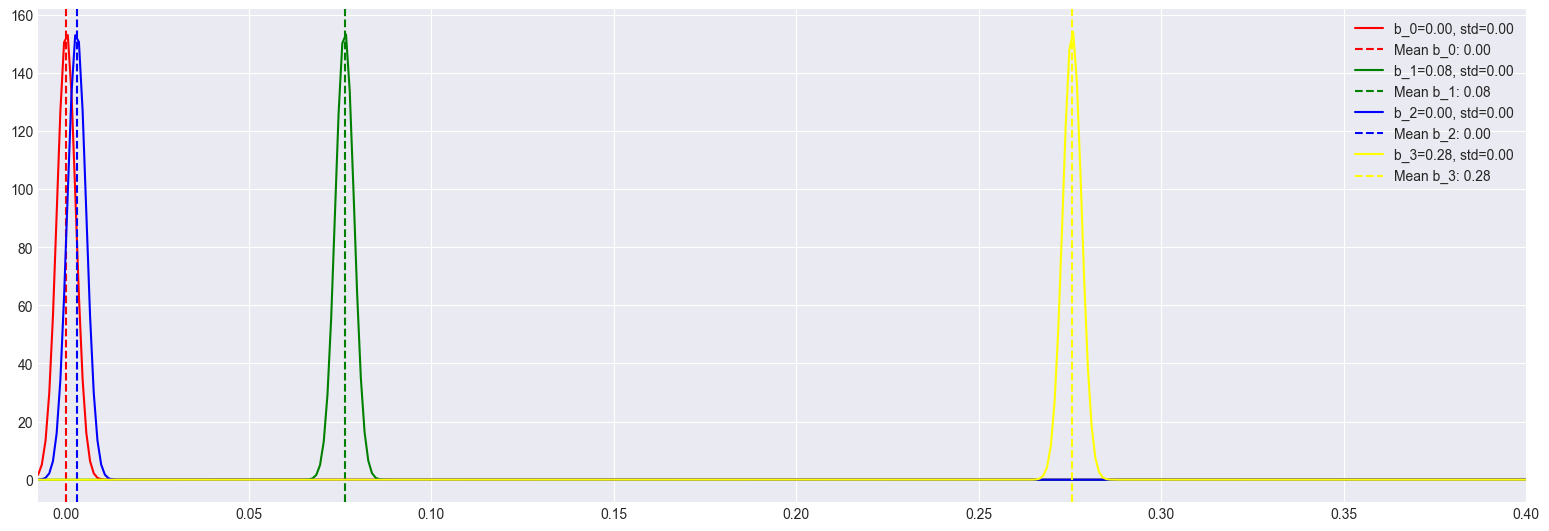

In [277]:
# Initializing values.
%config InlineBackend.print_figure_kwargs = {'bbox_inches': 'tight'}
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'pink']
cont = 0
# Getting the width of the current cell (in inches).
ancho_celda = plt.rcParams['figure.figsize'][0]
# Datos para el eje x (rango de valores)
x = np.linspace(min(estimators_normalized) - 3 * max(desv), max(estimators_normalized) + 3 * max(desv), N)
for estimator_normalized, dev in zip(estimators_normalized, desv):
    y = norm.pdf(x, estimator_normalized, dev)
    # Probability density function.
    plt.plot(x, y, color=colors[cont], label=f'b_{cont}={estimator_normalized:.2f}, std={dev:.2f}')
    plt.axvline(x=estimator_normalized, color=colors[cont], linestyle='--', label=f'Mean b_{cont}: {estimator_normalized:.2f}')
    plt.gcf().set_size_inches(ancho_celda*3, ancho_celda)
    cont += 1
# Show plot.
plt.xlim(min(estimators_normalized) - 3 * max(desv), 0.4)
plt.legend()
plt.show()

- Curvas Continuas: Cada una representa la función de densidad de probabilidad (PDF) de un estimador normalizado. La PDF muestra cómo se distribuyen los valores alrededor de la media (el estimador normalizado en este caso).

- Líneas Verticales Punteadas: Estas líneas indican la posición de la media para cada estimador normalizado.

- Colores: Se usan diferentes colores para distinguir entre diferentes estimadores y sus respectivas PDFs y medias.



In [278]:
# Function to implement t-test.
def t_test(estimators, desvs, n, alpha=0.05, two_sided=True):
    """
    t-test.
        Arguments:
            estimators: a list of values.
            desvs: a list of values.
            n = size of sample.
            alpha: a float value.
            two_sided: a boolean value
        Return:
            important: a boolean value
    """
    # Getting t
    t_list = list()
    for estimator, desv in zip(estimators, desvs):
        t_list.append(estimator / desv) 
    # Degrees of freedom.
    dof = n - len(desvs) - 1 
    # Getting critical value.
    critical_value = t.ppf(1 - alpha, dof)
    # Initializing values.
    important = list()
    for t_i in t_list:
        # Check if estimator is important or not.
        important.append(t_i > critical_value)
        
    return important

In [279]:
# Getting t_test results.
important = t_test(estimators, desv, N)
cont = 0
for estimator, important_i in zip(estimators, important):
    print(f'b_{cont} = {abs(estimator):5.2f} is important: {important_i}')
    cont += 1

b_0 =  0.06 is important: True
b_1 =  0.83 is important: True
b_2 =  0.09 is important: True
b_3 =  2.84 is important: True
